## 使用方法の要約
基本的な使用: RxnIVPsolv("sample_data.csv")でインスタンス化  
数値積分: get_ode_system()で必要なオブジェクトを取得  
エラーハンドリング: try-except文でエラーをキャッチ  
可視化: matplotlibで結果をプロット  
パラメータ解析: 異なる初期条件での比較  
これらの使用例は、現在のコードが正しく動作することを前提としています。もしエラーが発生した場合は、debug_ode_system()メソッドで詳細な情報を確認できます。  

## 反応式を記載したcsvファイルを指定する  

In [1]:
file_path = 'sample_data.csv'  # CSVファイルのパスを指定

## 数値積分を実行する場合  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from src.kineticsform.solve_ode import RxnIVPsolv

=== RxnIVPsolvクラスの初期化 ===
化学種の数: 8
化学種: ['AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
速度定数: {'k1': 0.054, 'k2': 1.4, 'k3': 0.031}

=== デバッグ情報 ===
Successfully created function for AcOEt with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for OHa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOiPr with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for iPrOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EGOAc2 with args: ['t', 'AcOEt', 'OHa1', 

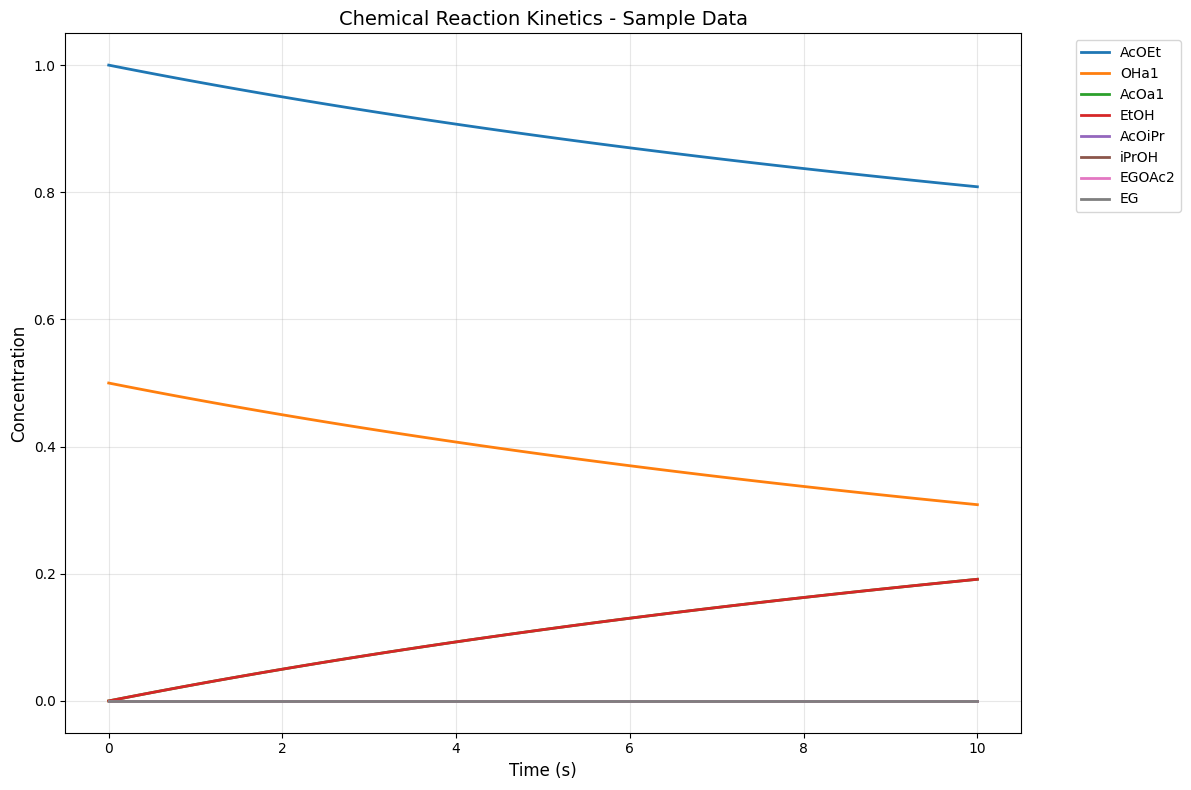


=== 最終時刻での濃度 ===
AcOEt: 0.808657
OHa1: 0.308657
AcOa1: 0.191343
EtOH: 0.191343
AcOiPr: 0.000000
iPrOH: 0.000000
EGOAc2: 0.000000
EG: 0.000000


In [3]:
# 基本的な数値積分
# RxnIVPsolvクラスのインスタンスを作成
print("=== RxnIVPsolvクラスの初期化 ===")
rxn_ivp_solv = RxnIVPsolv(file_path)
print(f"化学種の数: {len(rxn_ivp_solv.function_names)}")
print(f"化学種: {rxn_ivp_solv.function_names}")
print(f"速度定数: {rxn_ivp_solv.rate_consts_dict}")

# デバッグ情報を確認
print("\n=== デバッグ情報 ===")
debug_info = rxn_ivp_solv.debug_ode_system()
print(f"引数の順序: {debug_info['lambdify_args']}")
print(f"ODE式: {debug_info['ode_expressions']}")

# 数値積分に必要なオブジェクトを取得
print("\n=== ODEシステムの取得 ===")
result = rxn_ivp_solv.get_ode_system()
(system_of_equations, sympy_symbol_dict, 
 ode_system, function_names, rate_consts_dict) = result

print(f"取得されたODE関数: {list(ode_system.keys())}")

# 初期条件を設定（各化学種の初期濃度）
print("\n=== 初期条件の設定 ===")
initial_conditions = [1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # 8つの化学種
print(f"初期条件: {dict(zip(function_names, initial_conditions))}")

# 時間範囲を設定
t_span = (0, 10)  # 0から10秒
t_eval = np.linspace(0, 10, 100)

# 微分方程式の右辺を定義
def system_rhs(t, y):
    """ODEシステムの右辺を計算する関数"""
    result = []
    for i, species_name in enumerate(function_names):
        if species_name in ode_system:
            try:
                result.append(ode_system[species_name](t, *y))
            except Exception as e:
                print(f"Error in {species_name}: {e}")
                result.append(0.0)
        else:
            result.append(0.0)
    return result

# 数値積分を実行
print("\n=== 数値積分の実行 ===")
try:
    solution = solve_ivp(
        system_rhs, 
        t_span, 
        initial_conditions, 
        t_eval=t_eval,
        method='RK45'
    )
    print("数値積分が成功しました！")
    
    # 結果をプロット
    print("\n=== 結果のプロット ===")
    plt.figure(figsize=(12, 8))
    
    for i, species_name in enumerate(function_names):
        plt.plot(solution.t, solution.y[i], label=species_name, linewidth=2)
    
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Concentration', fontsize=12)
    plt.title('Chemical Reaction Kinetics - Sample Data', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 最終時刻での濃度を表示
    print("\n=== 最終時刻での濃度 ===")
    final_concentrations = {name: conc[-1] for name, conc in zip(function_names, solution.y)}
    for name, conc in final_concentrations.items():
        print(f"{name}: {conc:.6f}")
        
except Exception as e:
    print(f"数値積分でエラーが発生しました: {e}")
    print("デバッグ情報を確認してください。")

=== 反応系シミュレーションの実行 ===
Successfully created function for AcOEt with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for OHa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOiPr with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for iPrOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EGOAc2 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EG with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr

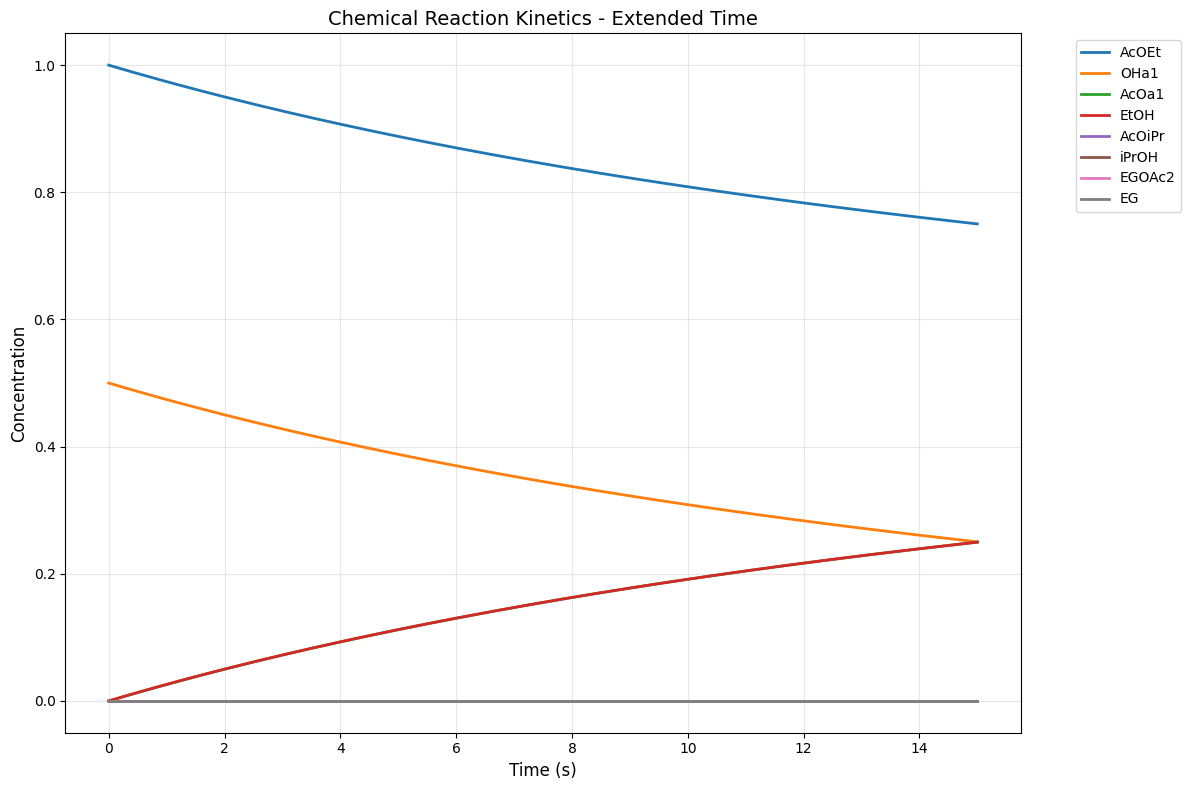

In [4]:
# エラーハンドリング付きの使用例
def run_reaction_simulation(file_path, initial_conditions=None, t_span=(0, 10), n_points=100):
    """反応系の数値積分を実行する関数
    
    Args:
        file_path (str): CSVファイルのパス
        initial_conditions (dict, optional): 初期条件の辞書
        t_span (tuple): 時間範囲 (開始, 終了)
        n_points (int): 時間点の数
    
    Returns:
        tuple: (成功フラグ, 結果, エラーメッセージ)
    """
    try:
        # RxnIVPsolvクラスのインスタンスを作成
        rxn_ivp_solv = RxnIVPsolv(file_path)
        
        # 初期条件が指定されていない場合、デフォルト値を設定
        if initial_conditions is None:
            n_species = len(rxn_ivp_solv.function_names)
            initial_conditions = [1.0 if i == 0 else 0.0 for i in range(n_species)]
        
        # 数値積分に必要なオブジェクトを取得
        result = rxn_ivp_solv.get_ode_system()
        (system_of_equations, sympy_symbol_dict, 
         ode_system, function_names, rate_consts_dict) = result
        
        # 時間配列を作成
        t_eval = np.linspace(t_span[0], t_span[1], n_points)
        
        # 微分方程式の右辺を定義
        def system_rhs(t, y):
            result = []
            for i, species_name in enumerate(function_names):
                if species_name in ode_system:
                    result.append(ode_system[species_name](t, *y))
                else:
                    result.append(0.0)
            return result
        
        # 数値積分を実行
        solution = solve_ivp(
            system_rhs, 
            t_span, 
            initial_conditions, 
            t_eval=t_eval,
            method='RK45'
        )
        
        return True, solution, None
        
    except Exception as e:
        return False, None, str(e)

# 使用例
print("=== 反応系シミュレーションの実行 ===")
success, solution, error = run_reaction_simulation(
    "sample_data.csv",
    initial_conditions=[1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    t_span=(0, 15),
    n_points=150
)

if success:
    print("シミュレーションが成功しました！")
    
    # 結果の可視化
    plt.figure(figsize=(12, 8))
    
    for i, species_name in enumerate(rxn_ivp_solv.function_names):
        plt.plot(solution.t, solution.y[i], label=species_name, linewidth=2)
    
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Concentration', fontsize=12)
    plt.title('Chemical Reaction Kinetics - Extended Time', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print(f"シミュレーションでエラーが発生しました: {error}")

=== パラメータ感度解析 ===
Successfully created function for AcOEt with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for OHa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOiPr with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for iPrOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EGOAc2 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EG with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'i

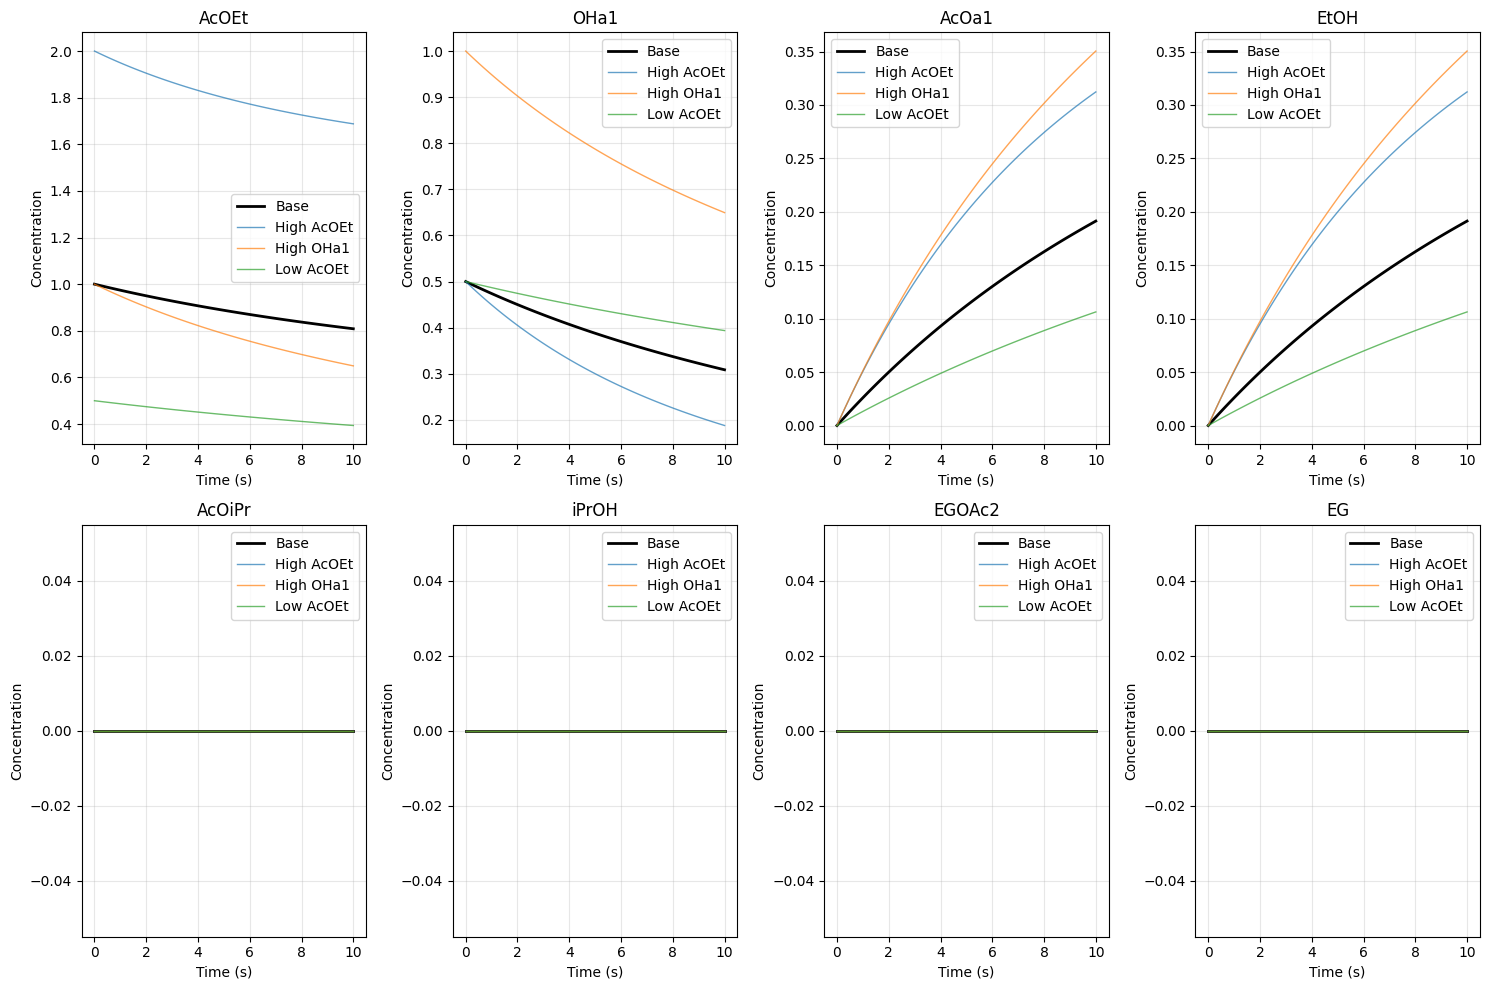

In [5]:
# パラメーター感度解析の例
def parameter_sensitivity_analysis(file_path, base_conditions, t_span=(0, 10)):
    """パラメータ感度解析を実行する関数"""
    
    # 基本条件でのシミュレーション
    success, base_solution, error = run_reaction_simulation(
        file_path, base_conditions, t_span
    )
    
    if not success:
        print(f"基本シミュレーションでエラー: {error}")
        return
    
    # 異なる初期条件でのシミュレーション
    variations = [
        ("High AcOEt", [2.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        ("High OHa1", [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        ("Low AcOEt", [0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    ]
    
    plt.figure(figsize=(15, 10))
    
    # 基本条件のプロット
    for i, species_name in enumerate(rxn_ivp_solv.function_names):
        plt.subplot(2, 4, i+1)
        plt.plot(base_solution.t, base_solution.y[i], 
                label='Base', linewidth=2, color='black')
        
        # 変動条件のプロット
        for var_name, var_conditions in variations:
            success, var_solution, error = run_reaction_simulation(
                file_path, var_conditions, t_span
            )
            if success:
                plt.plot(var_solution.t, var_solution.y[i], 
                        label=var_name, linewidth=1, alpha=0.7)
        
        plt.title(f'{species_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Concentration')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# パラメータ感度解析の実行
print("=== パラメータ感度解析 ===")
base_conditions = [1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
parameter_sensitivity_analysis("sample_data.csv", base_conditions)

## 記号的な操作による基本的なODE生成を実行する場合  
*Restart kernel*

In [6]:
# 記号的な操作による基本的なODE生成が必要
from pprint import pprint
from src.kineticsform.rxn_reader import RxnToODE

# ファイルパスを指定するだけで自動的に処理される
rxn_to_ode = RxnToODE(file_path)
# または
# rxn_to_ode = RxnToODE("sample_data.csv", encoding="shift_jis")
pprint(vars(rxn_to_ode))

{'encoding': 'utf-8',
 'file_path': 'sample_data.csv',
 'function_names': ['AcOEt',
                    'OHa1',
                    'AcOa1',
                    'EtOH',
                    'AcOiPr',
                    'iPrOH',
                    'EGOAc2',
                    'EG'],
 'functions_dict': {'AcOEt': AcOEt,
                    'AcOa1': AcOa1,
                    'AcOiPr': AcOiPr,
                    'EG': EG,
                    'EGOAc2': EGOAc2,
                    'EtOH': EtOH,
                    'OHa1': OHa1,
                    'iPrOH': iPrOH},
 'rate_consts_dict': {'k1': 0.054, 'k2': 1.4, 'k3': 0.031},
 'reactant_eq': [[['1', 0.054],
                  [['', 'AcOEt'], ['', 'OHa1']],
                  [['', 'AcOa1'], ['', 'EtOH']],
                  [],
                  ['k1*AcOEt(t)*OHa1(t)', ['', ''], ['', '']]],
                 [['2', 1.4],
                  [['', 'AcOiPr'], ['', 'OHa1']],
                  [['', 'AcOa1'], ['', 'iPrOH']],
                  [],
    

## モジュールrxn_reader内の関数の使用例  
*Restart kernel*

In [7]:
# 使用例
from src.kineticsform.rxn_reader import (
    get_reactions, 
    to_chempy_style, 
    reactant_consumption, 
    generate_sys_ode, 
    get_unique_species, 
    rate_constants
)

In [8]:
reactions = get_reactions(file_path)
print(reactions)

[[['1', 0.054], [['', 'AcOEt'], ['', 'OHa1']], [['', 'AcOa1'], ['', 'EtOH']], []], [['2', 1.4], [['', 'AcOiPr'], ['', 'OHa1']], [['', 'AcOa1'], ['', 'iPrOH']], []], [['3', 0.031], [['', 'EGOAc2'], ['2', 'OHa1']], [['2', 'AcOa1'], ['', 'EG']], []]]


In [9]:
list(map(to_chempy_style, reactions))

[[['1', 0.054], {'AcOEt': 1, 'OHa1': 1}, {'AcOa1': 1, 'EtOH': 1}],
 [['2', 1.4], {'AcOiPr': 1, 'OHa1': 1}, {'AcOa1': 1, 'iPrOH': 1}],
 [['3', 0.031], {'EGOAc2': 1, 'OHa1': 2.0}, {'AcOa1': 2.0, 'EG': 1}]]

In [10]:
reactant_eq = list(map(reactant_consumption, reactions))
reactant_eq

[[['1', 0.054],
  [['', 'AcOEt'], ['', 'OHa1']],
  [['', 'AcOa1'], ['', 'EtOH']],
  [],
  ['k1*AcOEt(t)*OHa1(t)', ['', ''], ['', '']]],
 [['2', 1.4],
  [['', 'AcOiPr'], ['', 'OHa1']],
  [['', 'AcOa1'], ['', 'iPrOH']],
  [],
  ['k2*AcOiPr(t)*OHa1(t)', ['', ''], ['', '']]],
 [['3', 0.031],
  [['', 'EGOAc2'], ['2', 'OHa1']],
  [['2', 'AcOa1'], ['', 'EG']],
  [],
  ['k3*EGOAc2(t)*OHa1(t)**2', ['', '2'], ['2', '']]]]

In [11]:
# generate_ode(reaction)
sys_odes_dict = generate_sys_ode(reactant_eq)
sys_odes_dict

{'AcOEt': '-k1*AcOEt(t)*OHa1(t)',
 'OHa1': '-k1*AcOEt(t)*OHa1(t)-k2*AcOiPr(t)*OHa1(t)-2*k3*EGOAc2(t)*OHa1(t)**2',
 'AcOa1': 'k1*AcOEt(t)*OHa1(t)+k2*AcOiPr(t)*OHa1(t)+2*k3*EGOAc2(t)*OHa1(t)**2',
 'EtOH': 'k1*AcOEt(t)*OHa1(t)',
 'AcOiPr': '-k2*AcOiPr(t)*OHa1(t)',
 'iPrOH': 'k2*AcOiPr(t)*OHa1(t)',
 'EGOAc2': '-k3*EGOAc2(t)*OHa1(t)**2',
 'EG': 'k3*EGOAc2(t)*OHa1(t)**2'}

In [12]:
unique_species_list = get_unique_species(reactant_eq)
unique_species_list

['AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']

In [13]:
rate_constants_dict = rate_constants(reactant_eq)
rate_constants_dict

{'k1': 0.054, 'k2': 1.4, 'k3': 0.031}